# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [1]:
from util import Analyser
import pdb
import re
LOG_PATH_ROOT="./"
analyser_col = Analyser(LOG_PATH_ROOT + "col_19.03.18.json")
analyser_row = Analyser(LOG_PATH_ROOT + "row_19.03.18.json")

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [2]:
print(analyser_col.get_repetitions())
#print(analyser_row.get_repetitions())

10


CPU: Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz

CPU Kerne: 4 (x2 Theads)

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachtet.

In [3]:
benchmark_row = analyser_row.get_row_benchmark()
benchmark_row.print_stats()

||Time in msec|
|--|--|
|Samples|10|
|Average|2033|
|Min|1913|
|Max|2382|
|Median|2001|
|Standard Deviation|121|
|Total|20325|

Table: General Data - Row Benchmark


## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [4]:
benchmark_col = analyser_col.get_column_benchmark()
benchmark_col.print_stats()

||Time in msec|
|--|--|
|Samples|10|
|Average|578|
|Min|442|
|Max|1718|
|Median|453|
|Standard Deviation|380|
|Total|5783|

Table: General Data - Column Benchmark


### Vergleich Zeilenbasiert vs. Spaltenbasiert

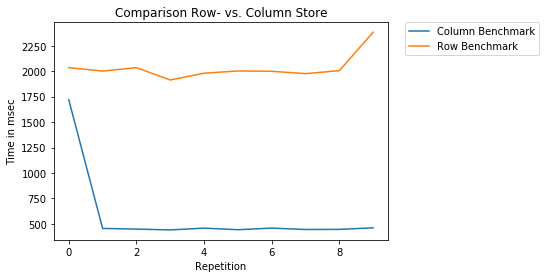

In [5]:
from util import Comparison
import re

column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.set_title("Comparison Row- vs. Column Store")
comparison.compare_visually()

In [6]:
comparison.set_title("Comparison Row- vs. Column Store in usec")
comparison.compare_raw()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Samples|10|10|
|Total|5783|20325|
|Max|1718|2382|
|Min|442|1913|
|Median|453|2001|
|Average|578|2033|
|Standard Deviation|380|121|

Table: Comparison Row- vs. Column Store in usec


In [7]:
comparison.compare()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Samples|10|10|
|Total|0.0|1.0|
|Max|0.0|1.0|
|Min|0.0|1.0|
|Median|0.0|1.0|
|Average|0.0|1.0|
|Standard Deviation|1.0|0.0|

Table: Comparison Row- vs. Column Store in usec


In [8]:
comparison.set_title("Comparison Row- vs. Column Store in msec")
comparison.compare(lambda x: x / 1000)

||Column Benchmark|Row Benchmark|
|--|--|--|
|Samples|10|10|
|Total|5.783|20.325|
|Max|1.718|2.382|
|Min|0.442|1.913|
|Median|0.453|2.001|
|Average|0.578|2.033|
|Standard Deviation|0.38|0.121|

Table: Comparison Row- vs. Column Store in msec


## Vergleich Row Column

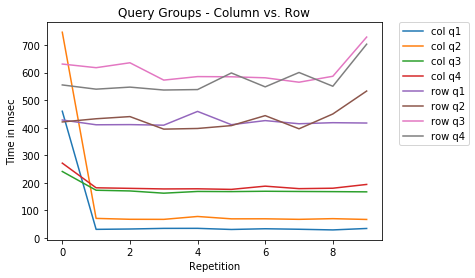

In [9]:
column_benchmark.set_prefix("col")
row_benchmark.set_prefix("row")
query_stats = column_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
query_stats += row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Groups - Column vs. Row")
comparison.compare_visually()

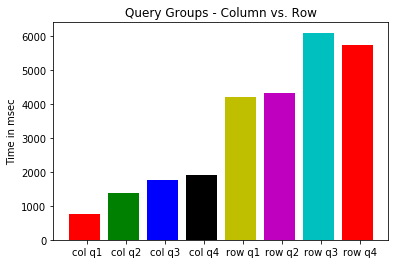

In [11]:
comparison.compare_bar_plot_aggr()

In [12]:
comparison.set_title("Query Groups - Column vs. Row in msec")
comparison.compare(lambda x: round(x / 1000, 1))

||col q1|col q2|col q3|col q4|row q1|row q2|row q3|row q4|
|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|
|Total|0.8|1.4|1.8|1.9|4.2|4.3|6.1|5.7|
|Max|0.5|0.7|0.2|0.3|0.5|0.5|0.7|0.7|
|Min|0.0|0.1|0.2|0.2|0.4|0.4|0.6|0.5|
|Median|0.0|0.1|0.2|0.2|0.4|0.4|0.6|0.5|
|Average|0.1|0.1|0.2|0.2|0.4|0.4|0.6|0.6|
|Standard Deviation|0.1|0.2|0.0|0.0|0.0|0.0|0.0|0.0|

Table: Query Groups - Column vs. Row in msec


In [13]:
comparison.set_title("Normalized Query Groups - Column vs. Row")
comparison.compare()

||col q1|col q2|col q3|col q4|row q1|row q2|row q3|row q4|
|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|
|Total|0.0|0.12|0.19|0.22|0.65|0.67|1.0|0.93|
|Max|0.43|1.0|0.0|0.06|0.43|0.58|0.97|0.91|
|Min|0.0|0.07|0.25|0.27|0.71|0.68|1.0|0.95|
|Median|0.0|0.07|0.24|0.27|0.69|0.71|1.0|0.93|
|Average|0.0|0.12|0.19|0.22|0.65|0.67|1.0|0.93|
|Standard Deviation|0.6|1.0|0.04|0.07|0.0|0.13|0.17|0.19|

Table: Normalized Query Groups - Column vs. Row


In [14]:
row_benchmark = analyser_row.get_row_benchmark()

query_stats = row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(row_benchmark,*query_stats)
comparison.compare_raw()

|| q1| q2| q3| q4|Row Benchmark|
|--|--|--|--|--|--|
|Samples|10|10|10|10|10|
|Total|4203|4315|6089|5718|20325|
|Max|459|533|729|703|2382|
|Min|409|395|565|537|1913|
|Median|416|427|586|549|2001|
|Average|420|432|609|572|2033|
|Standard Deviation|14|39|46|49|121|


In [15]:
column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()

row_query_stats = row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
row_comparison = Comparison(*row_query_stats, name="Row Store")
column_query_stats = column_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
column_comparison = Comparison(*column_query_stats, name="Column Store")

row_comparison.set_title("Queries - Row vs. Column in msec")
row_comparison.compare_with(column_comparison, "Average")

|| q1| q2| q3| q4|
|--|--|--|--|--|
|Row Store|420|432|609|572|
|Column Store|75|137|176|191|
|Difference|345|295|433|381|
|in %|82.1|68.3|71.1|66.6|

Table: Queries - Row vs. Column in msec


In [16]:
column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()

row_query_stats = row_benchmark.get_query_stats(lambda x: re.search("\\.", x))
row_comparison = Comparison(*row_query_stats, name="Row Store")
column_query_stats = column_benchmark.get_query_stats(lambda x: re.search("\\.", x))
column_comparison = Comparison(*column_query_stats, name="Column Store")

row_comparison.set_title("Queries - Row vs. Column in msec")
row_comparison.compare_with(column_comparison, "Average",
                            f=lambda x: round(x / 1000, 2),
                            ignore=lambda x: x == "in %")

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Row Store|0.17|0.13|0.13|0.16|0.14|0.13|0.24|0.14|0.11|0.11|0.23|0.2|0.15|
|Column Store|0.02|0.01|0.01|0.04|0.02|0.01|0.13|0.02|0.01|0.01|0.09|0.08|0.02|
|Difference|0.15|0.12|0.12|0.12|0.12|0.12|0.11|0.12|0.1|0.1|0.13|0.11|0.14|
|in %|86.9|93.0|96.2|73.5|85.9|95.2|45.4|84.5|93.8|93.6|59.6|58.5|89.4|

Table: Queries - Row vs. Column in msec


### Stabilität des Benchmarks

#### Spaltenbasiert

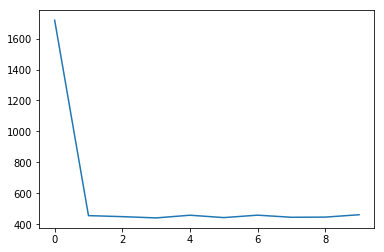

In [17]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser_col.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

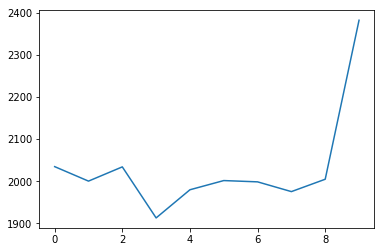

In [18]:
benchmark = analyser_row.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachtet.

### Spaltenbasiert

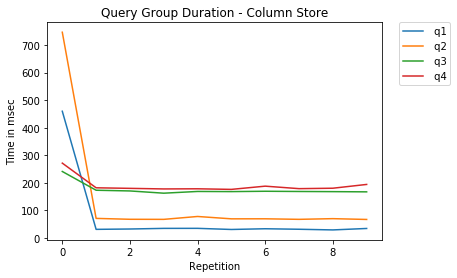

In [19]:
from util import display_table
import re

benchmark = analyser_col.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Column Store")
comparison.compare_visually()

In [20]:
print(query_stats)

[<util.analyser.Statistical object at 0x7f6cd9922c88>, <util.analyser.Statistical object at 0x7f6cd9997978>, <util.analyser.Statistical object at 0x7f6cd9931da0>, <util.analyser.Statistical object at 0x7f6cd9984048>]


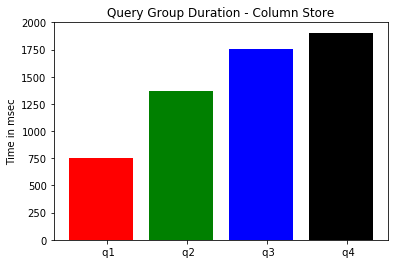

In [21]:
comparison.compare_bar_plot_aggr()

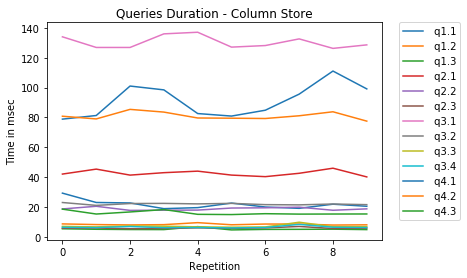

In [22]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Column Store")
comparison.compare_visually()

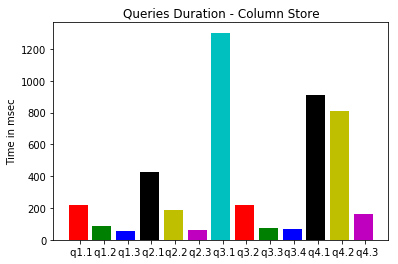

In [24]:
comparison.compare_bar_plot_aggr()

In [25]:
comparison.set_title("Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Total|219|86|54|427|190|61|1303|221|73|67|914|810|162|
|Max|29|10|7|46|21|7|137|23|10|9|111|85|19|
|Min|19|8|5|40|18|6|126|21|7|6|79|78|15|
|Median|21|8|5|42|19|6|128|22|7|6|90|80|15|
|Average|22|9|5|43|19|6|130|22|7|7|91|81|16|
|Standard Deviation|3|0|1|2|1|0|4|1|1|1|10|2|1|

Table: Queries Duration in usec - Column Store


In [26]:
comparison.set_title("Normalized Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Total|0.13|0.03|0.0|0.3|0.11|0.01|1.0|0.13|0.02|0.01|0.69|0.61|0.09|
|Max|0.17|0.02|0.0|0.3|0.11|0.0|1.0|0.12|0.02|0.02|0.8|0.6|0.09|
|Min|0.12|0.02|0.0|0.29|0.11|0.01|1.0|0.13|0.02|0.01|0.61|0.6|0.08|
|Median|0.13|0.02|0.0|0.3|0.11|0.01|1.0|0.14|0.02|0.01|0.69|0.61|0.08|
|Average|0.14|0.03|0.0|0.3|0.11|0.01|1.0|0.14|0.02|0.02|0.69|0.61|0.09|
|Standard Deviation|0.3|0.0|0.1|0.2|0.1|0.0|0.4|0.1|0.1|0.1|1.0|0.2|0.1|

Table: Normalized Queries Duration - Column Store


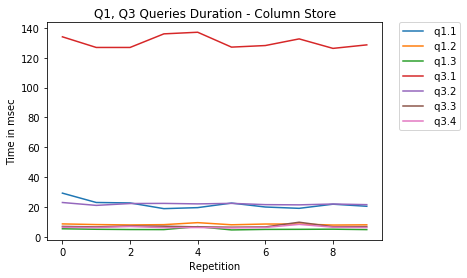

In [27]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [28]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|
|Total|219|86|54|1303|221|73|67|
|Max|29|10|7|137|23|10|9|
|Min|19|8|5|126|21|7|6|
|Median|21|8|5|128|22|7|6|
|Average|22|9|5|130|22|7|7|
|Standard Deviation|3|0|1|4|1|1|1|

Table: Q1, Q3 Queries Duration in usec - Column Store


In [29]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|
|Total|0.13|0.03|0.0|1.0|0.13|0.02|0.01|
|Max|0.17|0.02|0.0|1.0|0.12|0.02|0.02|
|Min|0.12|0.02|0.0|1.0|0.13|0.02|0.01|
|Median|0.13|0.02|0.0|1.0|0.14|0.02|0.01|
|Average|0.14|0.03|0.0|1.0|0.14|0.02|0.02|
|Standard Deviation|0.75|0.0|0.25|1.0|0.25|0.25|0.25|

Table: Normalized Q1, Q3 Queries Duration - Column Store


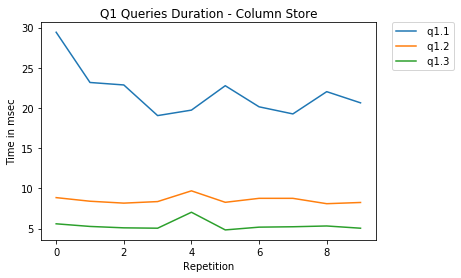

In [30]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Column Store")
comparison.compare_visually()

In [31]:
comparison.set_title("Q1 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|219|86|54|
|Max|29|10|7|
|Min|19|8|5|
|Median|21|8|5|
|Average|22|9|5|
|Standard Deviation|3|0|1|

Table: Q1 Queries Duration in usec - Column Store


In [32]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|1.0|0.19|0.0|
|Max|1.0|0.14|0.0|
|Min|1.0|0.21|0.0|
|Median|1.0|0.19|0.0|
|Average|1.0|0.24|0.0|
|Standard Deviation|1.0|0.0|0.33|

Table: Normalized Q1 Queries Duration - Column Store


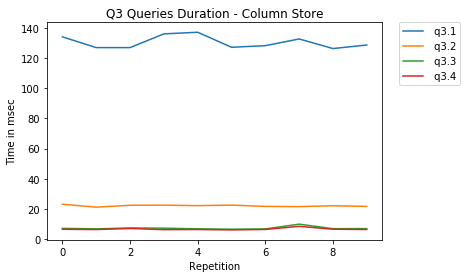

In [33]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [34]:
comparison.set_title("Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|1303|221|73|67|
|Max|137|23|10|9|
|Min|126|21|7|6|
|Median|128|22|7|6|
|Average|130|22|7|7|
|Standard Deviation|4|1|1|1|

Table: Q3 Queries Duration in usec - Column Store


In [35]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|1.0|0.12|0.0|0.0|
|Max|1.0|0.11|0.01|0.0|
|Min|1.0|0.12|0.01|0.0|
|Median|1.0|0.13|0.01|0.0|
|Average|1.0|0.12|0.0|0.0|
|Standard Deviation|1.0|0.0|0.0|0.0|

Table: Normalized Q3 Queries Duration - Column Store


## Zeilenbasiert

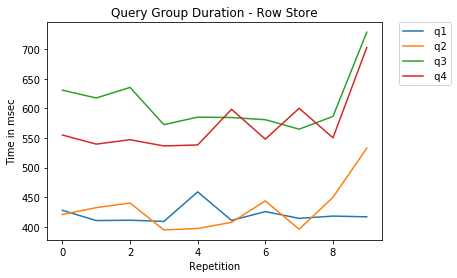

In [36]:
benchmark = analyser_row.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Row Store")
comparison.compare_visually()

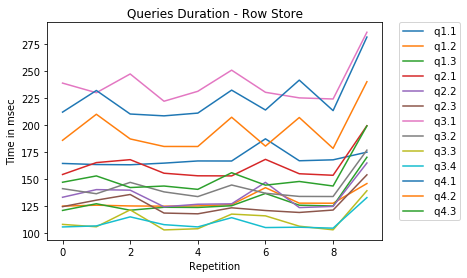

In [37]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Row Store")
comparison.compare_visually()

In [38]:
comparison.set_title("Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Total|1683|1293|1297|1622|1348|1263|2382|1419|1122|1100|2253|1953|1514|
|Max|187|146|170|199|165|154|286|176|139|133|281|240|199|
|Min|163|125|121|153|123|118|222|133|103|104|208|178|140|
|Median|166|126|125|155|130|122|230|137|107|106|213|186|145|
|Average|168|129|130|162|135|126|238|142|112|110|225|195|151|
|Standard Deviation|7|7|14|14|13|11|18|12|11|8|22|19|16|

Table: Queries Duration in usec - Row Store


In [39]:
comparison.set_title("Normalized Queries Duration - Row Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q2.1| q2.2| q2.3| q3.1| q3.2| q3.3| q3.4| q4.1| q4.2| q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Total|0.45|0.15|0.15|0.41|0.19|0.13|1.0|0.25|0.02|0.0|0.9|0.67|0.32|
|Max|0.35|0.08|0.24|0.43|0.21|0.14|1.0|0.28|0.04|0.0|0.97|0.7|0.43|
|Min|0.5|0.18|0.15|0.42|0.17|0.13|1.0|0.25|0.0|0.01|0.88|0.63|0.31|
|Median|0.48|0.16|0.15|0.4|0.19|0.13|1.0|0.25|0.01|0.0|0.86|0.65|0.31|
|Average|0.45|0.15|0.16|0.41|0.2|0.12|1.0|0.25|0.02|0.0|0.9|0.66|0.32|
|Standard Deviation|0.0|0.0|0.47|0.47|0.4|0.27|0.73|0.33|0.27|0.07|1.0|0.8|0.6|

Table: Normalized Queries Duration - Row Store


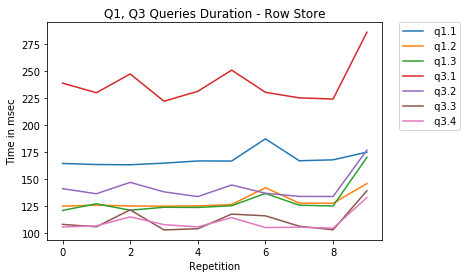

In [40]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [41]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|
|Total|1683|1293|1297|2382|1419|1122|1100|
|Max|187|146|170|286|176|139|133|
|Min|163|125|121|222|133|103|104|
|Median|166|126|125|230|137|107|106|
|Average|168|129|130|238|142|112|110|
|Standard Deviation|7|7|14|18|12|11|8|

Table: Q1, Q3 Queries Duration in usec - Row Store


In [42]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Row Store")
comparison.compare()

|| q1.1| q1.2| q1.3| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|--|--|--|
|Samples|10|10|10|10|10|10|10|
|Total|0.45|0.15|0.15|1.0|0.25|0.02|0.0|
|Max|0.35|0.08|0.24|1.0|0.28|0.04|0.0|
|Min|0.5|0.18|0.15|1.0|0.25|0.0|0.01|
|Median|0.48|0.16|0.15|1.0|0.25|0.01|0.0|
|Average|0.45|0.15|0.16|1.0|0.25|0.02|0.0|
|Standard Deviation|0.0|0.0|0.64|1.0|0.45|0.36|0.09|

Table: Normalized Q1, Q3 Queries Duration - Row Store


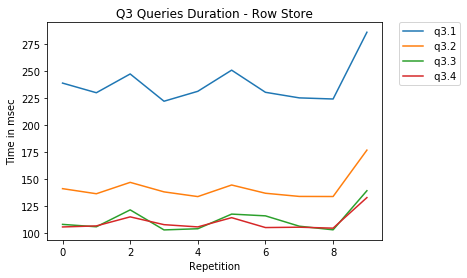

In [43]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [44]:
comparison.set_title("Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|2382|1419|1122|1100|
|Max|286|176|139|133|
|Min|222|133|103|104|
|Median|230|137|107|106|
|Average|238|142|112|110|
|Standard Deviation|18|12|11|8|

Table: Q3 Queries Duration in usec - Row Store


In [45]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1| q3.2| q3.3| q3.4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|1.0|0.25|0.02|0.0|
|Max|1.0|0.28|0.04|0.0|
|Min|1.0|0.25|0.0|0.01|
|Median|1.0|0.25|0.01|0.0|
|Average|1.0|0.25|0.02|0.0|
|Standard Deviation|1.0|0.4|0.3|0.0|

Table: Normalized Q3 Queries Duration - Column Store


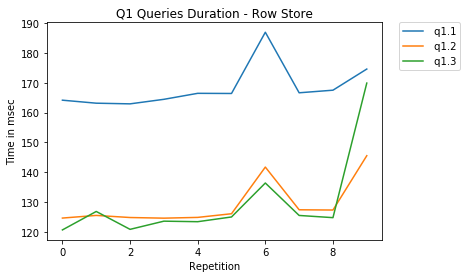

In [46]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Row Store")
comparison.compare_visually()

In [47]:
comparison.set_title("Q1 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|1683|1293|1297|
|Max|187|146|170|
|Min|163|125|121|
|Median|166|126|125|
|Average|168|129|130|
|Standard Deviation|7|7|14|

Table: Q1 Queries Duration in usec - Row Store


In [48]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1| q1.2| q1.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|1.0|0.0|0.01|
|Max|1.0|0.0|0.59|
|Min|1.0|0.1|0.0|
|Median|1.0|0.02|0.0|
|Average|1.0|0.0|0.03|
|Standard Deviation|0.0|0.0|1.0|

Table: Normalized Q1 Queries Duration - Column Store


## Indizes

### Vergleich von allen Messwerten

In [49]:
column_benchmark = analyser_col.get_column_benchmark()
index_column_benchmark = analyser_col.get_column_benchmark_I()
row_benchmark = analyser_row.get_row_benchmark()
index_row_benchmark = analyser_row.get_row_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark, row_benchmark, index_row_benchmark)

comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|5783|5182|20325|18850|
|Max|1718|559|2382|1934|
|Min|442|505|1913|1871|
|Median|453|517|2001|1880|
|Average|578|518|2033|1885|
|Standard Deviation|380|16|121|17|


In [50]:
comparison.compare()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|0.04|0.0|1.0|0.9|
|Max|0.64|0.0|1.0|0.75|
|Min|0.0|0.04|1.0|0.97|
|Median|0.0|0.04|1.0|0.92|
|Average|0.04|0.0|1.0|0.9|
|Standard Deviation|1.0|0.0|0.29|0.0|


### Spaltenbasiert

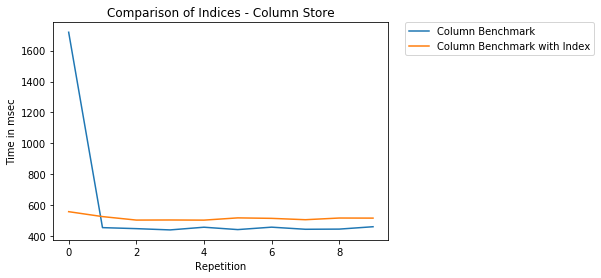

In [51]:
column_benchmark = analyser_col.get_column_benchmark()
index_column_benchmark = analyser_col.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.set_title("Comparison of Indices - Column Store")
comparison.compare_visually()

In [52]:
comparison.set_title("Comparison of Indices in usec - Column Store")
comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|
|--|--|--|
|Samples|10|10|
|Total|5783|5182|
|Max|1718|559|
|Min|442|505|
|Median|453|517|
|Average|578|518|
|Standard Deviation|380|16|

Table: Comparison of Indices in usec - Column Store


In [53]:
from util import Analyser
LOG_PATH_ROOT="./"
analyser2 = Analyser(LOG_PATH_ROOT + "col_19.03.18.json")

column_benchmark = analyser2.get_column_benchmark()
index_column_benchmark = analyser2.get_column_benchmark_I()
column_benchmark_o = analyser2.get_column_benchmark_olap()
index_column_benchmark_o = analyser2.get_column_benchmark_I_olap()

query_stats_no = column_benchmark.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats = index_column_benchmark.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats_no_olap = column_benchmark_o.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats_olap = index_column_benchmark_o.get_query_stats(lambda x: re.search("1\\.2", x))
comparison = Comparison(*query_stats_no)
comparison.set_title("No index, no OLAP")
comparison.compare_raw()

comparison2 = Comparison(*query_stats)
comparison2.set_title("Index, no OLAP")
comparison2.compare_raw()

comparison3 = Comparison(*query_stats_no_olap)
comparison3.set_title("No index, OLAP")
comparison3.compare_raw()

comparison4 = Comparison(*query_stats_olap)
comparison4.set_title("Index, OLAP")
comparison4.compare_raw()



|| q1.2|
|--|--|
|Samples|10|
|Total|86|
|Max|10|
|Min|8|
|Median|8|
|Average|9|
|Standard Deviation|0|

Table: No index, no OLAP


|| q1.2|
|--|--|
|Samples|10|
|Total|65|
|Max|7|
|Min|6|
|Median|7|
|Average|6|
|Standard Deviation|0|

Table: Index, no OLAP


|| q1.2|
|--|--|
|Samples|10|
|Total|55|
|Max|6|
|Min|5|
|Median|6|
|Average|6|
|Standard Deviation|0|

Table: No index, OLAP


|| q1.2|
|--|--|
|Samples|10|
|Total|54|
|Max|6|
|Min|5|
|Median|5|
|Average|5|
|Standard Deviation|0|

Table: Index, OLAP


In [54]:
comparison = Comparison(index_column_benchmark,column_benchmark, column_benchmark_o, index_column_benchmark_o)
comparison.compare_raw()

||Column Benchmark|Column Benchmark OLAP|Column Benchmark with Index|Column Benchmark with Index OLAP|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|5783|1630|5182|1647|
|Max|1718|186|559|185|
|Min|442|159|505|161|
|Median|453|160|517|163|
|Average|578|163|518|165|
|Standard Deviation|380|8|16|7|


### Zeilenbasiert

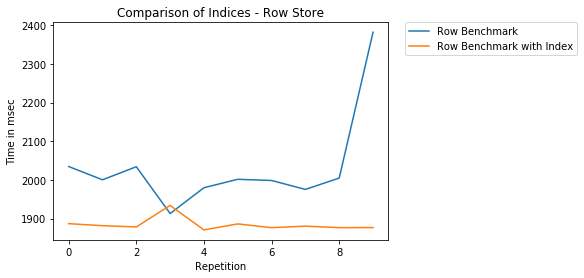

In [55]:
r_b = analyser_row.get_row_benchmark()
i_r_b = analyser_row.get_row_benchmark_I()
col_b = analyser_col.get_column_benchmark()
i_col_b = analyser_col.get_column_benchmark_I()
comparison = Comparison(r_b, i_r_b)

comparison.set_title("Comparison of Indices - Row Store")
comparison.compare_visually()

In [56]:
comparison.set_title("Comparison of Indices in msec - Row Store")
comparison.compare_raw()

q = r_b.get_query_stats(lambda x: not re.search("\\.", x))
q_i = i_r_b.get_query_stats(lambda x: not re.search("\\.", x))

q2 = r_b.get_query_stats(lambda x: re.search("2\\.", x))
q_i2 = i_r_b.get_query_stats(lambda x: re.search("2\\.", x))

q4 = r_b.get_query_stats(lambda x: re.search("4\\.", x))
q_i4 = i_r_b.get_query_stats(lambda x: re.search("4\\.", x))

compQ = Comparison(*q)
compQ.set_title("Queries without indizes")
compQi = Comparison(*q_i)
compQi.set_title("Queries with indizes")
                               
compQ2 = Comparison(*q2)
compQ2.set_title("Query 2 without indizes")
compQi2 = Comparison(*q_i2)
compQi2.set_title("Query 2 with indizes")
                               
compQ4 = Comparison(*q4)
compQ4.set_title("Query 4 without indizes")
compQi4 = Comparison(*q_i4)
compQi4.set_title("Query 4 with indizes")

compQ.compare_raw()
compQi.compare_raw()
                               
compQ2.compare_raw()
compQi2.compare_raw()
                               
compQ4.compare_raw()
compQi4.compare_raw()

||Row Benchmark|Row Benchmark with Index|
|--|--|--|
|Samples|10|10|
|Total|20325|18850|
|Max|2382|1934|
|Min|1913|1871|
|Median|2001|1880|
|Average|2033|1885|
|Standard Deviation|121|17|

Table: Comparison of Indices in msec - Row Store


|| q1| q2| q3| q4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|4203|4315|6089|5718|
|Max|459|533|729|703|
|Min|409|395|565|537|
|Median|416|427|586|549|
|Average|420|432|609|572|
|Standard Deviation|14|39|46|49|

Table: Queries without indizes


|| q1| q2| q3| q4|
|--|--|--|--|--|
|Samples|10|10|10|10|
|Total|2214|1245|5756|9635|
|Max|225|126|582|1013|
|Min|219|123|573|954|
|Median|221|124|574|958|
|Average|221|124|576|963|
|Standard Deviation|2|1|3|17|

Table: Queries with indizes


|| q2.1| q2.2| q2.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|1622|1348|1263|
|Max|199|165|154|
|Min|153|123|118|
|Median|155|130|122|
|Average|162|135|126|
|Standard Deviation|14|13|11|

Table: Query 2 without indizes


|| q2.1| q2.2| q2.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|980|217|48|
|Max|100|22|5|
|Min|97|21|5|
|Median|98|22|5|
|Average|98|22|5|
|Standard Deviation|1|0|0|

Table: Query 2 with indizes


|| q4.1| q4.2| q4.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|2253|1953|1514|
|Max|281|240|199|
|Min|208|178|140|
|Median|213|186|145|
|Average|225|195|151|
|Standard Deviation|22|19|16|

Table: Query 4 without indizes


|| q4.1| q4.2| q4.3|
|--|--|--|--|
|Samples|10|10|10|
|Total|5118|3958|557|
|Max|525|400|67|
|Min|507|393|54|
|Median|510|395|54|
|Average|512|396|56|
|Standard Deviation|6|2|4|

Table: Query 4 with indizes


## compCol = Comparison(col_b, i_col_b)
compCol.set_title("Comparison of Indices - Column Store")
compCol.compare_visually()
compCol.compare_raw()

q = col_b.get_query_stats(lambda x: not re.search("\\.", x))
q_i = i_col_b.get_query_stats(lambda x: not re.search("\\.", x))

q2 = col_b.get_query_stats(lambda x: re.search("2\\.", x))
q_i2 = i_col_b.get_query_stats(lambda x: re.search("2\\.", x))

q4 = col_b.get_query_stats(lambda x: re.search("4\\.", x))
q_i4 = i_col_b.get_query_stats(lambda x: re.search("4\\.", x))
                               
                               
compQ = Comparison(*q)
compQ.set_title("Queries without indizes")
compQi = Comparison(*q_i)
compQi.set_title("Queries with indizes")
                               
compQ2 = Comparison(*q2)
compQ2.set_title("Query 2 without indizes")
compQi2 = Comparison(*q_i2)
compQi2.set_title("Query 2 with indizes")
                               
compQ4 = Comparison(*q4)
compQ4.set_title("Query 4 without indizes")
compQi4 = Comparison(*q_i4)
compQi4.set_title("Query 4 with indizes")

                               
                               
compQ.compare_raw()
compQi.compare_raw()
                               
compQ2.compare_raw()
compQi2.compare_raw()
                               
compQ4.compare_raw()
compQi4.compare_raw()